# Q & A Activity Week-10 group:13

In [254]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [255]:
data=pd.read_csv(r'C:\Users\Zephyr\Documents\Week#10\employee.csv')

In [256]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [257]:
data.shape

(9, 7)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [259]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

## 2. Reset the index as "name" as the index.

In [260]:
data=pd.read_csv(r'C:\Users\Zephyr\Documents\Week#10\employee.csv',index_col='name')

In [261]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3.Select rows for specific names Jack Morgan and Josh wills

In [262]:
select_row=data.loc[['Jack Morgan', 'Josh Wills']]


In [263]:
select_row

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance

In [264]:
select_data=data.loc[(data['department']=='Sales')| (data['department']=='Finance')]

select_data

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5. Display employee who has more than 700 performance score.

In [265]:
data.loc[data['performance_score'] < 700, ['performance_score']]

,performance_score
name,
S Kumar,520
Jack Morgan,674
Ying Chin,556
Satyam Sharma,649
James Authur,53


## 6. Display employee who has more than 500 and less than 700 performance score


In [266]:
select_emp=data.loc[(data['performance_score']>500) & (data['performance_score']<700)]
select_emp

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset.

In [267]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [268]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [269]:
data['gender'].mode()

0    F
dtype: object

In [270]:
data['gender'].fillna('F',inplace=True)

ie, replacing the missing values in gender with the mode we got  'F'
We can fill the rest with median of the dataset

In [271]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [272]:
for i in ['age', 'income']:
    data[i]=data[i].fillna(data[i].median())
    


In [273]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

The Missing calues have been taken care off.

In [274]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 8. Check the outliers and handle outliers in performance score using Percentiles.


Text(0.5, 1.0, 'Box plot of Performance Score')

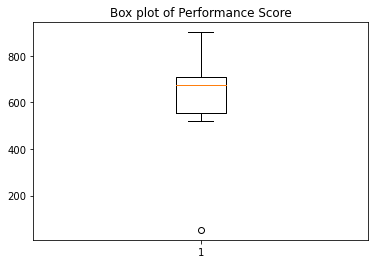

In [275]:
plt.boxplot(data['performance_score'])
plt.title("Box plot of Performance Score")

In [276]:
Q1= np.percentile(data['performance_score'], 25,interpolation='midpoint')
Q2= np.percentile(data['performance_score'], 50,interpolation='midpoint') 
Q3= np.percentile(data['performance_score'], 75,interpolation='midpoint')

data['performance_score'].median()
IQR= Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in data['performance_score']:
    if x<low_lim or x>up_lim:
        outlier.append(x)

In [277]:
print(low_lim)
print(up_lim)

323.5
943.5


In [278]:
outlier

[53]

In [279]:
#Replacing the Outlier with Median of Performance score

data.loc[data['performance_score']< low_lim,'performance_score' ]=data['performance_score'].median()

In [280]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,674
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


From the data set, there is only one outlier in performance score Which might be an experimental error
because all other individuals have performance score greater than 500, also the found out individual has a higher 
G3 grade with an income of 52000. So we replaced that outlier with median of the performance score.

## 9. Check the gender column and do Dummy encoding.

In [281]:
data['gender'].nunique()

2

In [282]:
data=pd.get_dummies(data,columns=['gender'])

In [283]:
data.head()

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0


## 10.Do the standard scaling on the feature performance score.

In [284]:
data.columns

Index(['age', 'income', 'department', 'grade', 'performance_score', 'gender_F',
       'gender_M'],
      dtype='object')

In [285]:
#split the data
y = data['performance_score']
x = data.drop(['performance_score','department','grade'], axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

#splitting is done. Now we need to create the linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

#check the MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print("R squared vale is:", r2_score(y_test, predictions))

MSE is : 47140.392828851545
R squared vale is: -0.2989823114707544


PERFORMING STANDARD SCALING

In [286]:
x.describe()

,age,income,gender_F,gender_M
count,9.000000,9.000000,9.000000,9.000000
mean,41.444444,52666.666667,0.777778,0.222222
std,10.760008,22544.400635,0.440959,0.440959
min,23.000000,16000.000000,0.000000,0.000000
25%,32.000000,42000.000000,1.000000,0.000000
50%,45.000000,52000.000000,1.000000,0.000000
75%,45.000000,62000.000000,1.000000,0.000000
max,54.000000,98000.000000,1.000000,1.000000


In [287]:
type(x)

pandas.core.frame.DataFrame

In [288]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
scale=standardisation.fit_transform(data[['performance_score']])
data['performance_score']=scale

In [289]:
data=pd.DataFrame(data)

In [290]:
data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.422890,1,0
S Kumar,45.0,16000.0,Finance,G0,-1.558187,1,0
Jack Morgan,32.0,35000.0,Finance,G2,-0.055301,0,1
Ying Chin,45.0,65000.0,Sales,G3,-1.206863,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.305782,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,-0.299276,1,0
James Authur,54.0,52000.0,Operations,G3,-0.055301,1,0
Josh Wills,54.0,52000.0,Finance,G3,2.159992,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.286264,0,1


In [291]:
#split the data
y = data['performance_score']
x = data.drop(['performance_score','department','grade'], axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

#splitting is done. Now we need to create the linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

#check the MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print("R squared vale is:", r2_score(y_test, predictions))

MSE is : 4.489561221795386
R squared vale is: -0.2989823114707544


Here from the MSE value, it is clear that Standard Scaling has significant effect on the model.